In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Add,Activation
from keras import backend as K
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 4s 0us/step


In [ ]:
y_proc=np.zeros((50000,100))
for i in range(0,50000):
    y_proc[i][y_train[i][0]]=1
y_test_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_test_proc[i][y_test[i][0]]=1
y_proc.shape
input_shape=(32,32,3)
y_test_proc[0]
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255
y_test_proc.shape

(10000, 100)

In [ ]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

In [ ]:
inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x=layers.Flatten()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)

outputs = layers.Dense(100, activation='softmax')(x)


vgg_net_model = keras.Model(inputs, outputs)

In [ ]:
vgg_net_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)       

In [ ]:
%load_ext tensorboard
tensor_board = tf.keras.callbacks.TensorBoard(log_dir='tensorboard',histogram_freq=1)
vgg_net_model.compile(optimizer=keras.optimizers.Adam(lr=0.0001,clipvalue=0.7,clipnorm=0.7),
              loss='categorical_crossentropy',
              metrics=['acc'])
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3,min_delta=0.0001)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='vgg_adam_noreg.hdf5',
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)
# vgg_net_model.fit(x_train,y_proc,batch_size=200,validation_data=(x_test,y_test_proc),epochs=50,callbacks=[callback,model_checkpoint_callback])
output=vgg_net_model.fit_generator(datagen.flow(x_train,y_proc,batch_size = 200), epochs = 100, validation_data = (x_test,y_test_proc),callbacks = [tensor_board,callback,model_checkpoint_callback])

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Epoch 1/100
250/250 [==============================] - 34s 136ms/step - loss: 2.1526 - acc: 0.4249 - val_loss: 2.5525 - val_acc: 0.3625
Epoch 2/100
250/250 [==============================] - 34s 135ms/step - loss: 2.1340 - acc: 0.4248 - val_loss: 2.5862 - val_acc: 0.3537
Epoch 3/100
250/250 [==============================] - 34s 134ms/step - loss: 2.1260 - acc: 0.4303 - val_loss: 2.4865 - val_acc: 0.3723
Epoch 4/100
250/250 [==============================] - 34s 135ms/step - loss: 2.1148 - acc: 0.4293 - val_loss: 2.5532 - val_acc: 0.3550
Epoch 5/100
250/250 [==============================] - 33s 134ms/step - loss: 2.1128 - acc: 0.4296 - val_loss: 2.5724 - val_acc: 0.3552
Epoch 6/100
250/250 [==============================] - 34s 135ms/step - loss: 2.1083 - acc: 0.4334 - val_loss: 2.5894 - val_acc: 0.3505
Epoch 7/100
250/250 [==============================] - 34s 135ms/step - loss: 2.0991 - acc: 0.

In [ ]:

y_pred=vgg_net_model.predict(x_test)
# tf.one_hot(y_pred)
# y_pred=np.where(y_pred[0]=max(y_pred[0],1,0))
y_pred_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_pred_proc[i][np.argmax(y_pred[i])]=1
print("Precision: "+ str(precision_score(y_test_proc, y_pred_proc, average='weighted')))
print("Recall: "+ str(recall_score(y_test_proc, y_pred_proc, average='weighted')))
print("Accuracy: "+ str(accuracy_score(y_test_proc, y_pred_proc)))

Precision: 0.41986625512164116
Recall: 0.3973
Accuracy: 0.3973


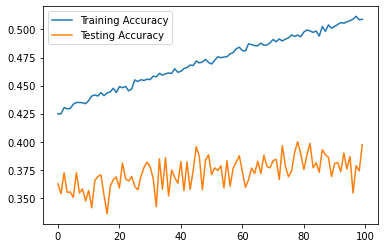

In [ ]:
plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.legend(['Training Accuracy','Testing Accuracy'])


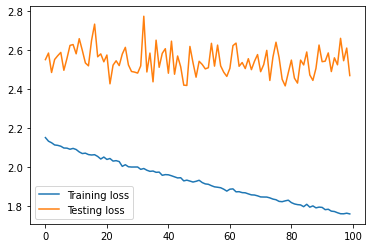

In [ ]:
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.legend(['Training loss','Testing loss'])

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import datetime as dt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D,Add,Activation
from keras import backend as K
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

y_proc=np.zeros((50000,100))
for i in range(0,50000):
    y_proc[i][y_train[i][0]]=1
y_test_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_test_proc[i][y_test[i][0]]=1
y_proc.shape
input_shape=(32,32,3)
y_test_proc[0]
x_train=x_train.astype('float')/255
x_test=x_test.astype('float')/255
y_test_proc.shape

inputs = keras.Input(shape=input_shape)
x = layers.Conv2D(32, 3, activation='relu')(inputs)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.Conv2D(128, 3, activation='relu')(x)
x = layers.MaxPool2D((3,3),strides=(1,1), padding='same')(x)
x=layers.Flatten()(x)

x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(256, activation='relu')(x)

outputs = layers.Dense(100, activation='softmax')(x)


vgg_net_model = keras.Model(inputs, outputs)

vgg_net_model.load_weights('../weights/vgg_adam_noreg.hdf5')


y_pred=vgg_net_model.predict(x_test)
# tf.one_hot(y_pred)
# y_pred=np.where(y_pred[0]=max(y_pred[0],1,0))
y_pred_proc=np.zeros((10000,100))
for i in range(0,10000):
    y_pred_proc[i][np.argmax(y_pred[i])]=1
print("Precision: "+ str(precision_score(y_test_proc, y_pred_proc, average='weighted')))
print("Recall: "+ str(recall_score(y_test_proc, y_pred_proc, average='weighted')))
print("Accuracy: "+ str(accuracy_score(y_test_proc, y_pred_proc)))

169009152/169001437 [==============================] - 4s 0us/step
Precision: 0.41381561376338094
Recall: 0.4
Accuracy: 0.4
